In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path
from skimage.io import imread

def read_from_folder(folder):
    data_dir = os.path.join(os.getcwd(),folder)
    img_list = []
    for name in os.listdir(data_dir):
        img = imread(os.path.join(data_dir, name))
        img_list.append(img)
    return img_list

In [2]:
imgs_per_cat = dict()
imgs_per_cat['papel'] = read_from_folder('papel')
imgs_per_cat['pedra'] = read_from_folder('pedra')
imgs_per_cat['tesoura'] = read_from_folder('tesoura')

papel: 13 images


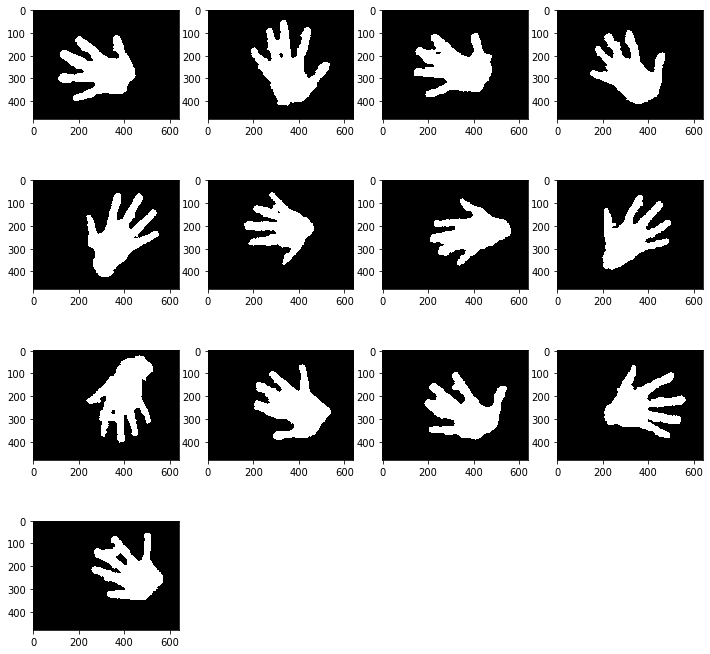

pedra: 14 images


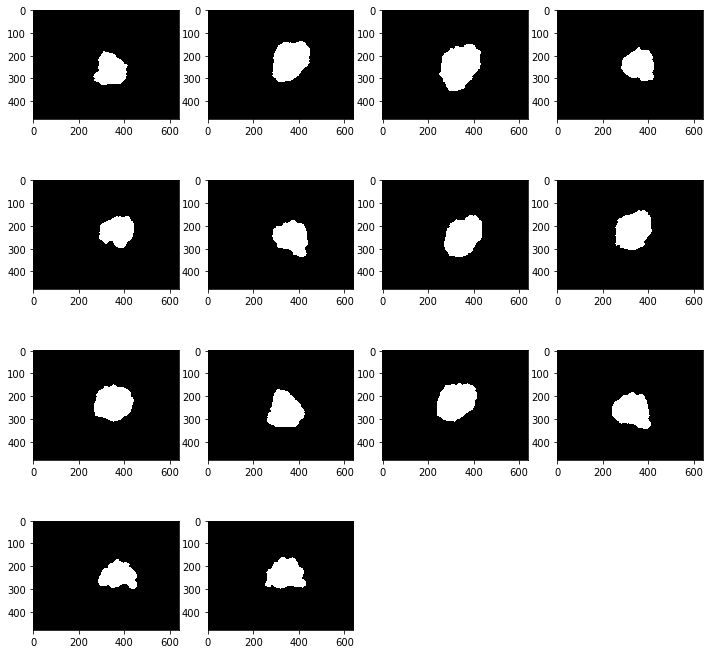

tesoura: 13 images


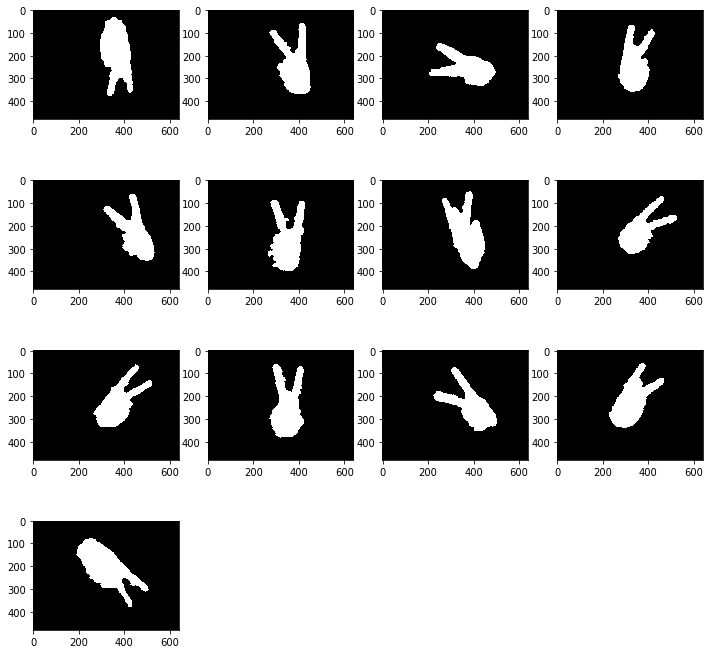

In [3]:
def show_images(imgs):
    C = 4
    N = len(imgs)
    R = (N - 1)//C + 1
    
    plt.figure(figsize=(C*3, R*3))
    for k, img in enumerate(imgs):
        plt.subplot(R, C, k+1)
        plt.imshow(img, cmap='gray')
    plt.show()

for cat, imgs in imgs_per_cat.items():
    print(f'{cat}: {len(imgs)} images')
    show_images(imgs)

In [4]:
from skimage.measure import regionprops, perimeter

X = []
y = []

for cat, imgs in imgs_per_cat.items():
    for img in imgs:
        props = regionprops(img)[0]
        eccentricity = props['eccentricity']
        hu_moments = props['moments_hu']
        area = props['area']
        perimeter = props['perimeter']
        if perimeter == 0.0:
            perimeter = 1.0
        compactness = 4.0*np.pi*area/perimeter
        feats = [eccentricity, compactness] + list(hu_moments)
        X.append(feats)
        y.append(cat)

/home/wesgas/.virtualenvs/visao/lib/python3.6/site-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/home/wesgas/.virtualenvs/visao/lib/python3.6/site-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

In [6]:
import joblib

joblib.dump(clf, 'meu_modelo.joblib')

['meu_modelo.joblib']

In [7]:
# Lendo o modelo.
clf = joblib.load('meu_modelo.joblib')

In [11]:
clf.predict([X_test[0]])

array(['pedra'], dtype='<U7')